In [1]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
df = pd.read_csv('dataset/dataset_labeling_facebook.csv') #Read dataset
df.to_numpy()
df

,Unnamed: 0,user,tweet,stem,label,tokenizing
0,0,Su Lastri,Walou ank sy dh bnyak tp sy klo lihat org lahi...,walou ank sy dh bnyak sy klo lihat org lahir s...,0,"['walou', 'ank', 'sy', 'dh', 'bnyak', 'tp', 's..."
1,1,Puji Riyanti Ibune Kraf,"Alhamdulillah mau merasakan yg ke 5 x nya, sem...",alhamdulillah rasa moga lancar selancar lncarn...,1,"['alhamdulillah', 'mau', 'merasakan', 'yg', 'k..."
2,2,Celina Meliala,WAduh bahagianya Ibu nih moga tahun ini saya d...,bahagia moga rasa bahagia manjadi sekrang,1,"['waduh', 'bahagianya', 'ibu', 'nih', 'moga', ..."
3,3,Hairol Erol,Alhamdulillah..... syukur apa yg ada PD kita d...,alhamdulillah syukur pd ayah jaga ank mu dgn c...,1,"['alhamdulillah', 'syukur', 'apa', 'yg', 'ada'..."
4,4,Meisya Putri,"Alhamdulillah mau merasakan untuk ke 3 xnya, s...",alhamdulillah rasa xnya moga d lancar salin sl...,1,"['alhamdulillah', 'mau', 'merasakan', 'untuk',..."
...,...,...,...,...,...,...
1600,1600,Firda Ummu Hisyam Harun,Kalau di Aulia Hospital kemaren saya bawa oran...,aulia hospital kemaren bawa orangtua obat dr i...,1,"['kalau', 'di', 'aulia', 'hospital', 'kemaren'..."
1601,1601,Setty Wahyuningsih,Syafakillah kk..,syafakillah kk,0,"['syafakillah', 'kk']"
1602,1602,Ash'habil Jannatil Atqo,Dokter nya dimana ni kk praktek nya ??,dokter mana ni kk praktek,0,"['dokter', 'nya', 'dimana', 'ni', 'kk', 'prakt..."
1603,1603,Ida Mutmainnatul Maulida,Semoga segara sembuh mba Makhtum,moga segara sembuh mba makhtum,0,"['semoga', 'segara', 'sembuh', 'mba', 'makhtum']"


In [4]:
# Setup X & y 
X = list()
y = list()

for i, r in df.iterrows():
    X.append(str(r['stem']))
    y.append(r['label'])
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
# Visualisasi Train Data
train_data = {'stem':list(), 'label':list()}
for xt in range(len(X_train)):
    train_data['stem'].append(X_train[xt])
    train_data['label'].append(y_train[xt])
train_data = pd.DataFrame(train_data)
train_data

,stem,label
0,bln penjara moga penegakhukum propesional dlm ...,-1
1,sikurity diam waaee,0
2,ga ush pake klarifikasi biar kapok,0
3,oh jd kalo polisi mau ya,0
4,suruh org tuax pasang infus sampah,-1
...,...,...
1198,nga kontrol langsung suruh sc ambil tindak nga...,0
1199,suruh pasang diri klu trima,0
1200,viralkan biar masuk dlm penjara,-1
1201,anak titip allah,0


In [6]:
## Menghitung setiap jumlah Negative, Neutral dan Positive yang ada di data train
train_label_positive = 0
train_label_negative = 0
train_label_neutral = 0 #

train_datasets = list()

for index, row in train_data.iterrows():
    if(row['stem'] != ''):
        if(row['label'] == -1):
            train_label_negative += 1
        elif(row['label'] == 0):
            train_label_neutral += 1 #
        else:
            train_label_positive  += 1

        ## Append array train_data
        to_append = {
            'stemming_tweet' : row['stem'],
            'label' : row['label']
        }
        train_datasets.append(to_append)
print('============================ TRAIN DATA ===============================')     
print('Total Label Positive = ', train_label_positive)
print('Total Label Neutral = ', train_label_neutral) #
print('Total Label Negative = ', train_label_negative)
print('=======================================================================')

============================ TRAIN DATA ===============================
Total Label Positive =  227
Total Label Neutral =  658
Total Label Negative =  318


In [7]:
# Visualisasi Test Data
test_data = {'stem':list(), 'label':list()}
for xt in range(len(X_test)):
    test_data['stem'].append(X_test[xt])
    test_data['label'].append(y_test[xt])
test_data = pd.DataFrame(test_data)
test_data

,stem,label
0,ngaku polisi heeeeh heee,0
1,alhamdulillah k anak lahir normal asa campur a...,1
2,kaya pas k dktr rahim sehat sehat ajja pas sma...,1
3,cantik manjaaa ya tik,1
4,satpam tolong,0
...,...,...
397,klo orang temperamen,0
398,suruh pasang aja rs mana ga terima salahin lho,1
399,bentar video klarifikasi maaf udah selesai polisi,1
400,sekuriti tolol diem doang,-1


In [8]:
## Menghitung setiap jumlah Negative, Neutral dan Positive yang ada di data test
test_label_positive = 0
test_label_negative = 0
test_label_neutral = 0

test_datasets = list()

for index, row in test_data.iterrows():
    if(row['stem'] != ''):
        if(row['label'] == -1):
            test_label_negative += 1
        elif(row['label'] == 0):
            test_label_neutral += 1 #
        else:
            test_label_positive  += 1

        ## Append array train_data
        to_append = {
            'stemming_tweet' : row['stem'],
            'label' : row['label']
        }
        test_datasets.append(to_append)
print('============================ Test DATA ===============================')     
print('Total Label Positive = ', test_label_positive)
print('Total Label Negative = ', test_label_negative)
print('Total Label Neutral = ', test_label_neutral) #
print('=======================================================================')

============================ Test DATA ===============================
Total Label Positive =  81
Total Label Negative =  98
Total Label Neutral =  223


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer     = TfidfVectorizer(norm='l2') # Membuat TF ID-F Vectorizer
X_train_corpus = vectorizer.fit_transform(X_train) # Mencari vocabulary
feature_names  = vectorizer.get_feature_names_out() # Mendapatkan Feature Names matrix
feature_names

array(['aaa', 'aaaaaaa', 'aamiin', ..., 'zhlim', 'zikir', 'zikirr'],
      dtype=object)

In [10]:
X_test_corpus = vectorizer.transform(X_test) # Masukan corpus test ke matrix train

df_vec_test = pd.DataFrame(X_test_corpus.toarray(), columns=feature_names)

## Algoritma Naive Bayes

In [11]:
model = GaussianNB()
model.fit(X_train_corpus.toarray(), y_train)
y_pred= model.predict((X_test_corpus.toarray()))
preds = y_pred.tolist()

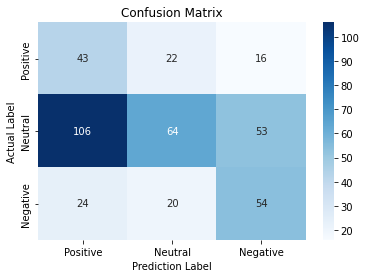

In [12]:
 # confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
    
Confusion_matrix = confusion_matrix(y_test, y_pred, labels=[1,0,-1])
class_label      = ['Positive', 'Neutral','Negative']
df_confusion     = pd.DataFrame(Confusion_matrix, index = class_label, columns = class_label)
sns.heatmap(df_confusion, annot=True, fmt = "d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Prediction Label')
plt.ylabel('Actual Label')
plt.show()

In [13]:
_accuracy   = accuracy_score(y_test, y_pred)
_precission = precision_score(y_test, y_pred, average='micro')
_recall     = recall_score(y_test, y_pred, average='micro')
_fscore     = f1_score(y_test, y_pred, average='micro')

print('Accuracy Score =', "{:.2f}".format(_accuracy))
print('Precission =', "{:.2f}".format(_precission))
print('Recall =', "{:.2f}".format(_recall))
print('F-Score =', "{:.2f}".format(_fscore))

Accuracy Score = 0.40
Precission = 0.40
Recall = 0.40
F-Score = 0.40


In [14]:
# Menghitung nilai akurasi dari klasifikasi naive bayes 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.44      0.55      0.49        98
           0       0.60      0.29      0.39       223
           1       0.25      0.53      0.34        81

    accuracy                           0.40       402
   macro avg       0.43      0.46      0.41       402
weighted avg       0.49      0.40      0.40       402



In [15]:
#persentase label hasil prediksi menggunakan algoritma Naive Bayes
df_result_nb = pd.DataFrame({'prediksi':y_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_nb = pd.DataFrame(df_result_nb['prediksi'].value_counts()/df_result_nb['prediksi'].count()*100)
df_persen_nb = df_persen_nb.rename(index={-1:'Negative', 0:'Neutral', 1:'Positive'})
df_persen_nb

,prediksi
Positive,43.03%
Negative,30.60%
Neutral,26.37%


In [16]:
print('Label', df_persen_nb.index[0] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_nb['prediksi'][0]), '%')
print('Label', df_persen_nb.index[1] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_nb['prediksi'][1]), '%')
print('Label', df_persen_nb.index[2] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_nb['prediksi'][2]), '%')

Label Positive memiliki persentase sebesar 43.03 %
Label Negative memiliki persentase sebesar 30.60 %
Label Neutral memiliki persentase sebesar 26.37 %


In [17]:
print('Prediksi menggunakan algoritma Naive Bayes menghasilkan label', df_persen_nb['prediksi'].idxmax() ,'memiliki persentase terbanyak sebesar', '{:,.2f}'.format(max(df_persen_nb['prediksi']), 2), '%')

Prediksi menggunakan algoritma Naive Bayes menghasilkan label Positive memiliki persentase terbanyak sebesar 43.03 %


## Algoritma SVM

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#Menggunakan GridSearch dengan fold 6 (melalui cv = 6)
param_grid = {'C': [1e2, 1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv = 6)
clf.fit(X_train_corpus.toarray(), y_train)
pred = clf.predict(X_test_corpus.toarray())
model.fit(X_train_corpus.toarray(), y_train)
y_pred= model.predict((X_test_corpus.toarray()))

In [19]:
print(clf.best_estimator_)

SVC(C=100.0, class_weight='balanced', gamma=0.1)


In [20]:
_accuracy   = accuracy_score(y_test, pred)
_precission = precision_score(y_test, pred, average='micro')
_recall     = recall_score(y_test, pred, average='micro')
_fscore     = f1_score(y_test, pred, average='micro')

print('Accuracy Score =', "{:.2f}".format(_accuracy))
print('Precission =', "{:.2f}".format(_precission))
print('Recall =', "{:.2f}".format(_recall))
print('F-Score =', "{:.2f}".format(_fscore))

Accuracy Score = 0.82
Precission = 0.82
Recall = 0.82
F-Score = 0.82


In [21]:
# Menghitung nilai akurasi dari klasifikasi SVM 
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.77      0.77      0.77        98
           0       0.82      0.88      0.85       223
           1       0.86      0.69      0.77        81

    accuracy                           0.82       402
   macro avg       0.82      0.78      0.80       402
weighted avg       0.82      0.82      0.81       402



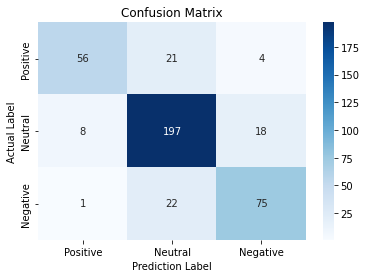

In [22]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
    
Confusion_matrix = confusion_matrix(y_test, pred, labels=[1,0,-1])
class_label      = ['Positive', 'Neutral','Negative']
df_confusion     = pd.DataFrame(Confusion_matrix, index = class_label, columns = class_label)
sns.heatmap(df_confusion, annot=True, fmt = "d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Prediction Label')
plt.ylabel('Actual Label')
plt.show()

In [23]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_svm = pd.DataFrame({'prediksi':pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_svm['prediksi'].value_counts()/df_result_svm['prediksi'].count()*100)
df_persen_svm = df_persen_svm.rename(index={-1:'Negative', 0:'Neutral', 1:'Positive'})
df_persen_svm

,prediksi
Neutral,59.70%
Negative,24.13%
Positive,16.17%


In [24]:
print('Label', df_persen_svm.index[0] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_svm['prediksi'][0]), '%')
print('Label', df_persen_svm.index[1] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_svm['prediksi'][1]), '%')
print('Label', df_persen_svm.index[2] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen_svm['prediksi'][2]), '%')

Label Neutral memiliki persentase sebesar 59.70 %
Label Negative memiliki persentase sebesar 24.13 %
Label Positive memiliki persentase sebesar 16.17 %


In [25]:
print('Prediksi menggunakan algoritma SVM menghasilkan label', df_persen_svm['prediksi'].idxmax() ,'memiliki persentase terbanyak sebesar', '{:,.2f}'.format(max(df_persen_svm['prediksi']), 2), '%')

Prediksi menggunakan algoritma SVM menghasilkan label Neutral memiliki persentase terbanyak sebesar 59.70 %


## Persentase label

In [26]:
#persentase label dataset
pd.options.display.float_format = '{:,.2f}%'.format
df_persen = pd.DataFrame(df['label'].value_counts()/df['label'].count()*100)
df_persen = df_persen.rename(index={-1:'Negative', 0:'Neutral', 1:'Positive'})
df_persen = df_persen.rename(columns={'label':'Persentase'})
df_persen

,Persentase
Neutral,54.89%
Negative,25.92%
Positive,19.19%


In [28]:
print('Label', df_persen.index[0] ,'memiliki persentase sebesar','{:,.2f}'.format( df_persen['Persentase'][0]), '%')
print('Label', df_persen.index[1] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen['Persentase'][1]), '%')
print('Label', df_persen.index[2] ,'memiliki persentase sebesar', '{:,.2f}'.format(df_persen['Persentase'][2]), '%')

Label Neutral memiliki persentase sebesar 54.89 %
Label Negative memiliki persentase sebesar 25.92 %
Label Positive memiliki persentase sebesar 19.19 %


In [29]:
print('Label', df_persen['Persentase'].idxmax() ,'memiliki persentase terbanyak sebesar', '{:,.2f}'.format(max(df_persen['Persentase']), 2), '%')

Label Neutral memiliki persentase terbanyak sebesar 54.89 %
